# COM2004/3004 - Understanding Sampling 

*Copyright &copy; 2023 University of Sheffield. All rights reserved*.

## Objectives

* To gain an intuitive understanding of sample statistics.

## 1. Background

In this lab class you will be using data that represents the weights and lengths of male and female **Bengal tigers**. In order to build classifiers we are going to want to be able to estimate the means (i.e., averages), variances and covariance of these measurements. In order to discover the true means and variances we would have to catch and measure every one of the roughly 2,500 tigers that are thought to exist – a project that is clearly impractical. So instead, we will have to be satisfied with an **estimate** of the true mean and variance that we will generate by looking at the statistics of a small **sample** of tigers (e.g., we might catch and measure 20 animals). The need to rely on a sample is generally always going to be the case: we will be interested in the statistics of a large population, but we will have to make do with estimates derived from a smaller – often much smaller – sample.

**The notebook is split into two parts.**

**In Part 1** we will be using Python to find out what happens when we try to compute estimates of statistics using small samples. We will see how the reliability of the estimates improves as the sample size increases. We will also see how estimates of variance and covariance can be biased (i.e., systematically too small or too large) if we do not handle the sample correctly.

**Part 2 consists of some Python programming challenges.**

Spend about half the lab class on each part. If you have not completed Part 1 after an hour then move on to Part 2 and return to Part 1 later.

## PART 1 – Sample Statistics

## 2. Loading and understanding the data

The tiger population data we are using has been made up (i.e., no-one really knows the weights and lengths of every living Bengal tiger) but it has been generated to be consistent with the ranges of weight and length that are quoted on Wikipedia. It has also been engineered so that the population statistics are nice round numbers, i.e., just to make things a little clearer.

(**Remember, to execute a cell, first click on it so that it is in focus and then click the run button in the tool bar, or shift-enter**).

Run the cell below to load the data.

In [1]:
import numpy as np

female_tigers = np.loadtxt(open("data/female_tigers.txt", "rb")).T
male_tigers = np.loadtxt(open("data/male_tigers.txt", "rb")).T

You will now have two matrices each with 1,250 rows and two columns. The rows represent the tigers (1,250 of each gender). The first columns gives the weight (in kg) and the second column the length (in cm).

In [2]:
print(female_tigers.shape)
print(female_tigers)

(1250, 2)
[[265.45546 166.52825]
 [253.22609 155.87294]
 [265.74264 157.97255]
 ...
 [259.56265 167.39329]
 [275.41995 178.16941]
 [269.91208 160.80506]]


We have access to the data for all the tigers so we can compute the true mean and variance of the weight and length features. For example, for the female tigers try,

In [3]:
print(np.mean(female_tigers, axis=0))
print(np.var(female_tigers, axis=0))

[259.99999999 160.00000004]
[ 49.96000173 119.90400031]


We are now going to imagine that we do not know this truth but need to estimate it from a small sample of tigers that have been caught, weighed and measured.

## 3. Sampling the data

Imagine that you have gone out and caught 20 female tigers and measured them. You would now know the measurements of 20 tigers of the 1250 that exist. Let’s simulate this experiment by taking the first 20 of the female tigers from our complete population data

In [4]:
sample = female_tigers[0:20, :]

Let’s compute the mean and variance of both the length and weight features in our sample,

In [5]:
print(np.mean(sample, axis=0))
print(np.var(sample, axis=0))

[260.794985 160.173054]
[47.41292601 74.2750873 ]


Notice how these estimates are not the same as the true mean and variance. But how close to the real values are they likely to be?

## 4. Repeated sampling

If we repeated our experiment and caught 20 different tigers we would get a different set of measurement and hence a different estimate of the mean and variance. Using Python we can simulate running this experiment 1000’s of times (i.e., catching a different 20 random tigers each time) and getting 1000’s of different estimates of the mean and variance. We can then plot a histogram of these estimates and compare them to the true mean and variance values, which we calculated above using knowledge of all 2500 tigers (and which we would not know in reality).

Let us write the code to perform the repeated sampling. In order to select 20 random tigers we use the `random.choice` function from Python's numpy library. This function can return randomly chosen integers between 0 and some maximum value. It can be instructed to select them 'without replacement' i.e. so that the same number cannot be chosen twice. We will use this to make an array of random indices amd then use this array to select random columns from the female_tiger data matrix.

In [6]:
chosen = np.random.choice(female_tigers.shape[0], 20, replace=False)
sample = female_tigers[chosen, :]
print(sample)

[[265.32604 158.77006]
 [256.19117 159.2782 ]
 [268.35811 168.04146]
 [260.68676 158.06538]
 [262.63    154.66303]
 [264.09281 173.65213]
 [251.65207 140.3124 ]
 [245.01152 135.10833]
 [260.40057 157.12948]
 [272.8332  164.73144]
 [261.54182 166.2613 ]
 [264.43049 150.41557]
 [273.58978 189.92056]
 [252.88025 152.94087]
 [267.46161 166.46805]
 [256.13064 147.46433]
 [261.01259 151.41161]
 [250.1797  148.90748]
 [255.65064 154.78877]
 [256.9238  160.68062]]


Now, using this new sample, re-compute the sample mean and variance for the tiger weights. We will see that the result has changed, i.e., the new sample has produced different estimates.

In [7]:
print(np.mean(sample[:, 0]))
print(np.var(sample[:, 0]))

260.3491785
52.37487544960275


Run the above two cells over and over again. Note how each time you get a different mean and variance estimate.

## 5. Writing a sampling function

We are now going to wrap our sampling and mean and variance calculations into an easily reusable function.

The function’s inputs should be the complete population data and the sample size; the output should be the mean and variance estimates, i.e., the first line of the function should look like this,

    def calc_sample_stats(data, N)

and the function's return statement will be,

    return mean_estimate, var_estimate

The full code is below,

In [8]:
def calc_sample_stats(data, N):
    chosen = np.random.choice(data.shape[0], N, replace=False)
    sample = data[chosen, :]
    mean_estimate = np.mean(sample, axis=0)
    var_estimate = np.var(sample, axis=0)
    return mean_estimate, var_estimate


print(calc_sample_stats(female_tigers, 20))

(array([260.2934055, 162.939498 ]), array([ 70.11376785, 149.11676709]))


Test the function the using different values of $N$ in the cell below,

In [9]:
# Write your solution here

print(calc_sample_stats(male_tigers, 20))

(array([290.094904, 198.654135]), array([ 40.28103527, 138.1406032 ]))


Now we will write another function called `do_sampling`. This function is going to call the `calc_sample_stats` function lots of times by using a loop. It will save the results of each run in a Python array.

In [10]:
def do_sampling(data, sample_size, n_repeats):
    sample_means = np.zeros((n_repeats, 2))
    sample_vars = np.zeros((n_repeats, 2))
    for i in range(n_repeats):
        sample_means[i, :], sample_vars[i, :] = calc_sample_stats(
            female_tigers, sample_size
        )
    return sample_means, sample_vars


sample_means, sample_vars = do_sampling(female_tigers, 20, 10)

We can now use matplotlib to plot a histogram of the results,

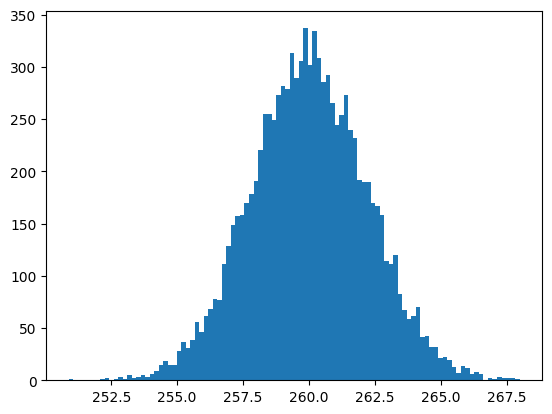

In [11]:
import matplotlib.pyplot as plt

sample_means, sample_vars = do_sampling(female_tigers, 10, 10000)
plt.hist(sample_means[:, 0], 100)
plt.show()

or

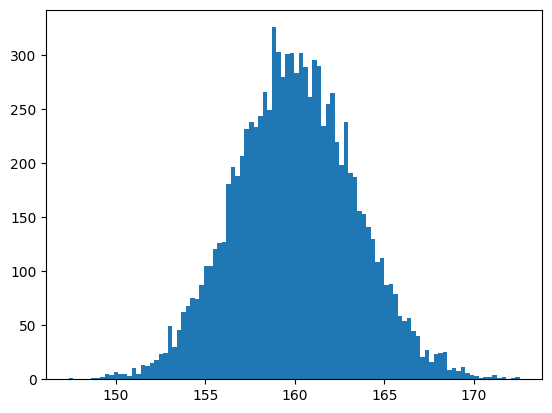

In [12]:
plt.hist(sample_means[:, 1], 100)
plt.show()

How does the distribution of the sample means compare with the true mean value?

To make a histogram of the variance estimates,

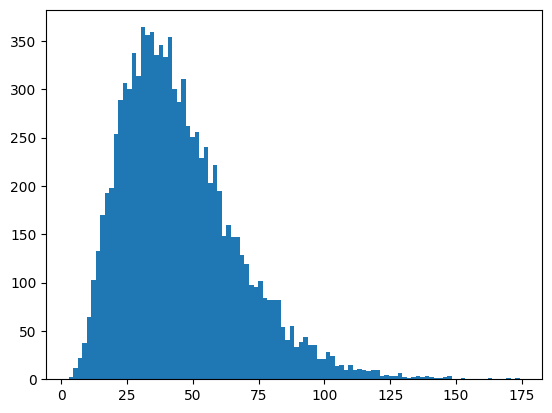

In [13]:
plt.hist(sample_vars[:, 0], 100)
plt.show()

or

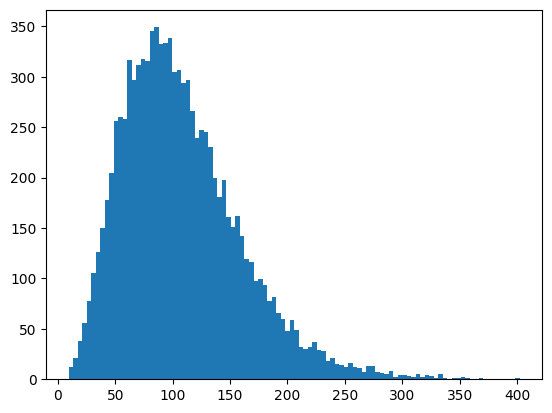

In [14]:
plt.hist(sample_vars[:, 1], 100)
plt.show()

How does the distribution of the sample variance compare with the true variance?

Calculate the average of the mean estimates, i.e., apply `np.mean` to `sample_means`. Are the estimates (on average) the same as the true mean value? Do the same for the variance estimates. Are the variance estimates on average the same as the true variance?

In [15]:
# Write your solution here
print(np.mean(sample_means, axis=0))
print(np.mean(sample_vars, axis=0))


[260.01230701 160.02649749]
[ 45.0586315  107.67906019]


## 6. Notes on bias

You should have noticed in the previous section that the variance estimates were on average lower than the true variance. The estimate is biased. You can correct for this bias by multiplying the estimate by $N/N-1$ where $N$ is the size of the sample.

(Why does the sample variance under-estimate the true variance? Informal explanation: The point to remember is that the variance is the average squared distance of points from the true mean. However, if we have a sample, we can only form an *estimate* of the mean. So when we estimate variance we end up computing the distance of points to the estimated mean not the true mean. The estimated mean is (by definition) going to lie at the centre of our sample of points and will therefore always be closer on average to the sample points than the true mean would have been. This is seen clearly by taking the extreme case of a sample size of 1. For a single point the sample mean will always be the sample itself, i.e. the distance to the sample mean is 0 so the sample variance is 0 - which is clearly a severe underestimate of the true variance.)

## 7. Experimenting with the sample size

Now let’s experiment with different sample sizes and see how changing the sample size changes the distribution of the estimates of mean and variance.

We will use sample sizes of 2, 5, 10, 20, 40 and 100.

Modify your `do_sampling` code by wrapping the sampling loop in an outer loop that sets the sample size. We will want to be able to compare the histograms that are generated for each sample size, so use the subplot command to send each histogram to a different subplot in the same figure.

Write the code for this in the empty cell below. You might need to use `plt.figure(figsize=(16, 6))` to resize your plot.

In [16]:
# Write your solution here
# this may take a minute to run...
# pos = 1
# plt.figure(figsize=(16, 6))
# for sample_size in [2,5,10,20,40,100]:
#     sample_means, sample_vars = do_sampling(female_tigers,sample_size,100000)

#     ax = plt.subplot(2, 6, pos)
#     ax.hist(sample_means[:, 0], 100)
#     ax.set_xlim(240, 280)
#     # plot histograms for the variances in the botton row of plots
#     ax = plt.subplot(2, 6, pos + 6)
#     ax.hist(sample_vars[:, 0], 100)
#     pos += 1






Note how the distribution of the estimates (i.e., the shape of the histograms) changes as the sample size increases. What do you notice about the width of the distributions?

## 8. Classifying

Compare the histogram of weights of the female and male tigers for the entire population. A simple classifier could choose a threshold weight $W$ and then if a tiger weighs more than $W$ it would label it as male and if it weighs less than $W$ it would label it as female. Looking at the histograms, what would be the best choice for the threshold weight $W$?



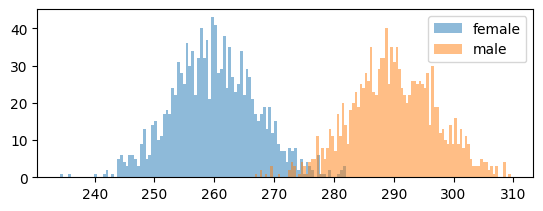

In [17]:
# Write your solution here
ax = plt.subplot(2, 1, 1)
x = ax.hist(female_tigers[:, 0], 100, alpha=0.5, label="female")
x = ax.hist(male_tigers[:, 0], 100, alpha=0.5, label="male")
plt.legend(loc="upper right")

Now take a sample of 100 female tigers and 100 male tigers. Plot histograms using these small samples. Looking at the histograms choose a threshold weight again. Is the threshold chosen using the small sample the same as the threshold you chose when using knowledge of the full set of data?

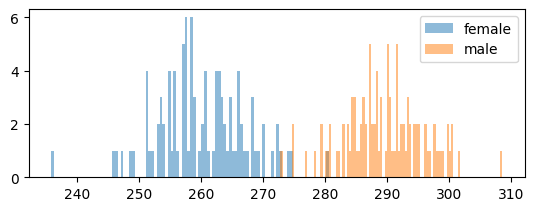

In [18]:
# Write your solution here
chose_male = np.random.choice(male_tigers.shape[0], 100, replace=False)
chose_female = np.random.choice(female_tigers.shape[0], 100, replace=False)

ax = plt.subplot(2, 1, 1)
x = ax.hist(female_tigers[chose_male, 0], 100, alpha=0.5, label="female")
x = ax.hist(male_tigers[chose_female, 0], 100, alpha=0.5, label="male")
plt.legend(loc="upper right")

#hosen = np.random.choice(data.shape[0], N, replace=False)


Having insufficient 'training data' can lead to poor choices when designing classifiers. For machine learning to work well we are going to need to work with large datasets.

## PART 2 – Programming Challenge

## 9. Programming exercises

For the final stage of the notebook you are going to be presented with four short programming exercises. There are many ways of coding solutions to each of these exercises. Some solutions will be a lot more efficient than others. Learning how to write efficient code is one of the challenges of using Python and numpy.

For each exercise measure the runtime of your solution. You can do this easily by the Jupyter `%timeit` command. The command measures the time it takes to execute a single line of code. So to time a block of code you can place the code you want to measure in a simple dummy function called `test()` and then use `%timeit` to time how long it takes to execute `test()`, i.e.,

    def test():
        somecode

    %timeit test()

As an example, consider the task of generating and storing 10,000 random numbers. There are three example solutions below. The solutions are functionally equivalent but have different runtimes. Writing efficient code can make a huge difference to execution time.

**Method 1** - Using a loop and preallocating storage using `np.zeros`

In [19]:
def test():
    x = np.zeros(10000)
    for n in range(10000):
        x[n] = np.random.uniform(0, 1)


%timeit test()

20.6 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Method 2** - Using a loop and preallocating unassigned storage using `np.empty`

In [20]:
def test():
    x = np.empty(10000)
    for n in range(10000):
        x[n] = np.random.uniform(0, 1)


%timeit test()

21.4 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Method 3** - Avoiding the loop by asking the `numpy.random.uniform` function to generate all the numbers in one call

In [21]:
def test():
    x = np.random.uniform(0, 1, 10000)


%timeit test()

81.8 µs ± 7.75 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


The table shows execution times in *ms* when running on a MacBook Pro,

|    | Method 1 | Method 2 | Method 3 |
| :- | :-: | :-: | :-: |
| Python 3 | 20.8 ms | 20.8 ms | 0.085 ms |


Note that the last solution is over 200 times faster than the first two!

Write solutions to the problems below in any way you please. Measure the execution times of your code for each exercise.

**Problem 1** Consider all the multiplications A times B for integers A and B lying in the range 1 to 1000. How many of these end in the digit 7. (Hint: You may want to experiment with the modulus '%' operator.)

In [22]:
# Write your solution here
def test():

    arr_mul = np.outer(np.arange(1,1001),np.arange(1,1001))
    end_in_7 = arr_mul %10 == 7

    sum = np.sum(end_in_7)

    return sum

%timeit test()

5.24 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Problem 2** Using the np.random.rand function generate 1,000,000 random numbers in the range 0 to 1 and then find the smallest and largest difference between a pair of adjacent numbers in the list.

In [23]:
# Write your solution here

def test():
    r = np.random.rand(1000000)

    d = np.diff(r)

    return d.max(), d.min()
    

%timeit test()

11.6 ms ± 552 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Problem 3** Find the integers A and B in the range 1 to 1000 for which A/B lies closest to pi/4.

In [24]:
# Write your solution here
def test():
    x = np.arange(1,1001)
    m = np.outer(x,1/x)

    diff = np.min(np.abs(np.pi/4 - m))
    indices = np.where(np.abs(np.pi/4 - m) == diff)

    return x[indices[1]]

print(test())

[452 904]


**Problem 4** A random number is selected between 0 and 1 (with a uniform distribution). If a sequence of 4 such numbers is independently generated what is the probability that the sequence will be in ascending order? Estimate the probability by performing the experiment 1,000,000 times.

In [25]:
# Write your solution here